In [54]:
from keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

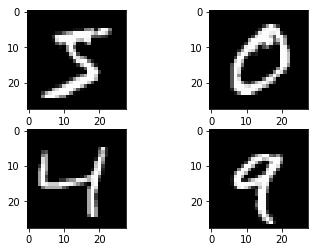

In [39]:
plt.subplot(221)
plt.imshow(X_train[0], plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[4], plt.get_cmap('gray'))
plt.show()

In [49]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th') #rgb 'channels_first

seed=7
np.random.seed(seed)

In [41]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [42]:
X_train/=255
X_test/=255

In [43]:
#onehot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [44]:
num_classes = y_train.shape[1]

In [59]:
def baseline_model():
    model = Sequential()
    model.add(Conv2D(8, (3,3), input_shape = (1,28,28), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(4, activation='relu'))
    model.add(Dense(num_classes))
    model.add(Lambda(lambda x: K.tf.nn.softmax(x)))    
    
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [60]:
model = baseline_model()

In [62]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),
         epochs=3, batch_size=32, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
 - 59s - loss: 0.4292 - acc: 0.8753 - val_loss: 0.3641 - val_acc: 0.9002
Epoch 2/3
 - 69s - loss: 0.3375 - acc: 0.9024 - val_loss: 0.2985 - val_acc: 0.9165
Epoch 3/3
 - 58s - loss: 0.2933 - acc: 0.9144 - val_loss: 0.2755 - val_acc: 0.9242


In [74]:
#save model
model.save('./model.h5')

In [75]:
scores = model.evaluate(X_test, y_test, verbose=2)
print("CNN error %.2f"%(100-scores[1]*100))

CNN error 7.58
